In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Activity4.csv')
df.head()

,Ax,Ay,Az,Gx,Gy,Gz,Class_ID,Length,Serial No,label
0,0.534683,0.630265,0.678817,0.205649,0.165600,0.093917,0,1500,1,Stand
1,0.455253,0.519574,0.588486,0.108781,0.113999,0.052762,0,1500,2,Stand
2,0.444592,0.539704,0.612586,0.122924,0.121796,0.055219,0,1500,3,Stand
3,0.450079,0.510291,0.629625,0.123947,0.135201,0.056633,0,1500,4,Stand
4,0.479079,0.602128,0.710999,0.120574,0.149512,0.065113,0,1500,5,Stand


In [ ]:
X = df[["Ax", "Ay", "Az", "Gx", "Gy", "Gz"]].values
y = df["Class_ID"].values

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(LSTM(128, input_shape=(1, X_train.shape[2]), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
57/57 [==============================] - 15s 46ms/step - loss: 0.9536 - accuracy: 0.8626 - val_loss: 0.6229 - val_accuracy: 0.9145
Epoch 2/30
57/57 [==============================] - 1s 18ms/step - loss: 0.3951 - accuracy: 0.9819 - val_loss: 0.2361 - val_accuracy: 0.9956
Epoch 3/30
57/57 [==============================] - 1s 17ms/step - loss: 0.1212 - accuracy: 0.9945 - val_loss: 0.0544 - val_accuracy: 0.9956
Epoch 4/30
57/57 [==============================] - 1s 16ms/step - loss: 0.0404 - accuracy: 0.9945 - val_loss: 0.0229 - val_accuracy: 0.9956
Epoch 5/30
57/57 [==============================] - 1s 13ms/step - loss: 0.0253 - accuracy: 0.9945 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 6/30
57/57 [==============================] - 1s 12ms/step - loss: 0.0156 - accuracy: 0.9978 - val_loss: 0.0091 - val_accuracy: 0.9978
Epoch 7/30
57/57 [==============================] - 1s 13ms/step - loss: 0.0105 - accuracy: 0.9984 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 8/30
5

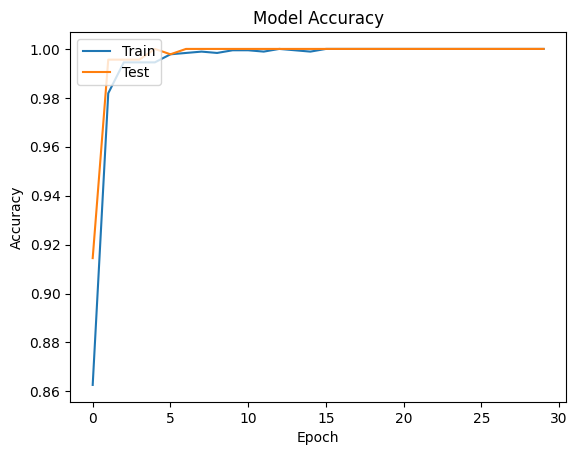

In [ ]:
# Accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

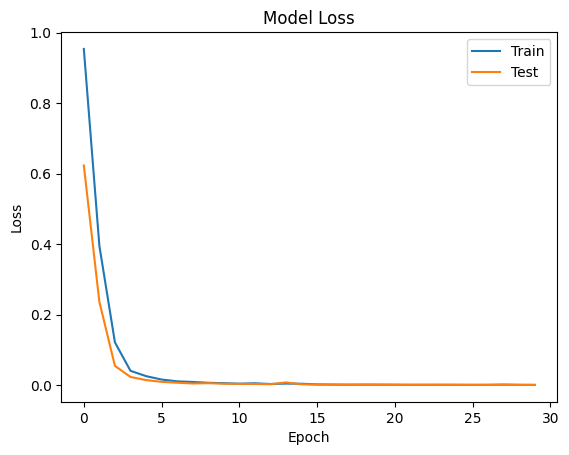

In [ ]:
# Loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
# Define the hardcoded input values
hardcoded_input = np.array([[7.16584587097168, 3.754108190536499, 5.525817394256592, 0.001832595793530345, 0.025656340643763542, 0.009162978269159794]])

# Normalize the hardcoded input
#hardcoded_input = (hardcoded_input - np.mean(X_train)) / np.std(X_train)

# Reshape the input for LSTM
hardcoded_input = hardcoded_input.reshape(hardcoded_input.shape[0], 1, hardcoded_input.shape[1])

# Make the prediction
prediction = model.predict(hardcoded_input)

# Convert the prediction probabilities to class labels
predicted_class = label_encoder.inverse_transform(np.argmax(prediction, axis=1))

print("Predicted Class:", predicted_class)

1/1 [==============================] - 1s 862ms/step
Predicted Class: [0]


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

15/15 [==============================] - 0s 2ms/step


In [ ]:
y_test_orig = np.argmax(y_test, axis=1)


In [ ]:
cm = confusion_matrix(y_test_orig, y_pred)

In [ ]:
class_labels = label_encoder.classes_

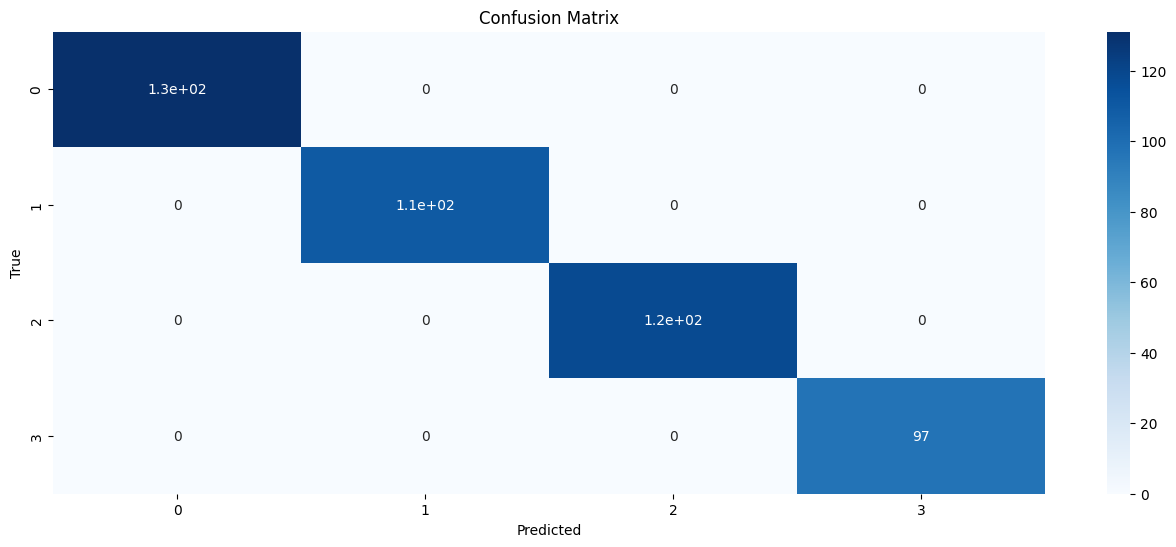

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("activity_model6.h5")

In [ ]:
print('Input Shape:', model.input_shape)  # Shape of the input tensor
print('Output Shape:', model.output_shape)  # Shape of the output tensor

Input Shape: (None, 1, 6)
Output Shape: (None, 4)
